In [1]:
import json
with open("../cleaned_data_json/sample.json") as f:
    data=json.load(f)

In [2]:
import scispacy
import spacy
nlp = spacy.load("en_core_sci_sm") #biomedical specially trained model knows stop words of medical language

In [3]:
#Merged abstract and body-text of a paper as doc
text = [i["abstract"].lower()+" "+i["body_text"].lower() for i in data["text"]]

In [4]:
#Took 2000 Research Papers for modelling
cleaned_data = text
print("TOTAL DOCS : ", len(cleaned_data))

TOTAL DOCS :  2000


In [5]:
"""SPACY CAN CONSOLIDATE ALL OF THE TEXT CLEANING OPERATIONS UNDER ONE LINE """
"""THIS TAKES A TEXT AS INPUT TOKENIZES IT AND THEN DISCARDS THE TOKENS IF THEY BELONG TO""" 
"""PUNCTUATIONS STOP WORDS URLS EMAILS"""
tokens_data = [[token.lower_ for token in nlp.tokenizer(cd) if not token.is_punct and not token.is_stop and not token.is_space and not token.like_url and not token.like_email] for cd in cleaned_data ]

In [6]:
#Checking stops_words
tokens_data_pool = [t for tokens in tokens_data for t in tokens]
from collections import Counter
wrds = Counter(tokens_data_pool)

In [7]:
stop_words_found = "preprint license copyright author/funder word count text https doi figure holder data cases medrxiv biorxiv made time may study high total population number granted used using also international fig cc-by-nc-nd rights reserved peer-reviewed et al. medrxiv copyright auther/funder copyright copyrights pre print preprint = fig fig. figure "

In [8]:
"This is the problem with stop_words_found also called bekar even when the word is not present it will signal as if it's there."
if "pre" in stop_words_found:
    print("yes")

yes


In [9]:
stop_words_found = stop_words_found.split() #Best way to keep stop words
tokens_data = [[token for token in td if token not in stop_words_found] for td in tokens_data]

In [10]:
#After splitting and converting into list it works as thought.
if "pre" in stop_words_found:
    print("yes")

yes


In [11]:
# Fitted LDA
from gensim import models, corpora
NUM_TOPICS=10
dictionary = corpora.Dictionary(tokens_data)
print(len(dictionary))
corpus = [dictionary.doc2bow(t) for t in tokens_data]
lda_model = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

199244


In [12]:
for idx in range(NUM_TOPICS):
    print("\nTopic #%s:" % idx, lda_model.print_topic(idx, 50))


Topic #0: 0.005*"1" + 0.004*"patients" + 0.004*"virus" + 0.004*"cells" + 0.004*"viral" + 0.004*"2" + 0.004*"infection" + 0.003*"protein" + 0.003*"3" + 0.002*"4" + 0.002*"analysis" + 0.002*"found" + 0.002*"10" + 0.002*"5" + 0.002*"table" + 0.002*"disease" + 0.002*"covid-19" + 0.002*"samples" + 0.002*"model" + 0.002*"studies" + 0.002*"expression" + 0.002*"gene" + 0.002*"results" + 0.002*"different" + 0.002*"de" + 0.002*"available" + 0.002*"case" + 0.002*"human" + 0.002*"control" + 0.002*"rna" + 0.001*"c" + 0.001*"sequence" + 0.001*"binding" + 0.001*"days" + 0.001*"group" + 0.001*"transmission" + 0.001*"viruses" + 0.001*"rate" + 0.001*"activity" + 0.001*"observed" + 0.001*"reported" + 0.001*"health" + 0.001*"proteins" + 0.001*"increased" + 0.001*"p" + 0.001*"respiratory" + 0.001*"clinical" + 0.001*"shown" + 0.001*"identified" + 0.001*"levels"

Topic #1: 0.008*"cells" + 0.004*"1" + 0.004*"t" + 0.004*"2" + 0.004*"cell" + 0.003*"infection" + 0.003*"c" + 0.003*"virus" + 0.003*"e" + 0.003*"5"

In [13]:
papertopic={}
for i,t in enumerate(tokens_data):
    result=lda_model[dictionary.doc2bow(tokens_data[i])]
    maxresult=result[0][1]
    for j in result:
        if j[1]>maxresult:
            maxresult=j[1]
    topic=[j[0] for j in result if j[1]==maxresult][0]
    papertopic[str(i)]=topic

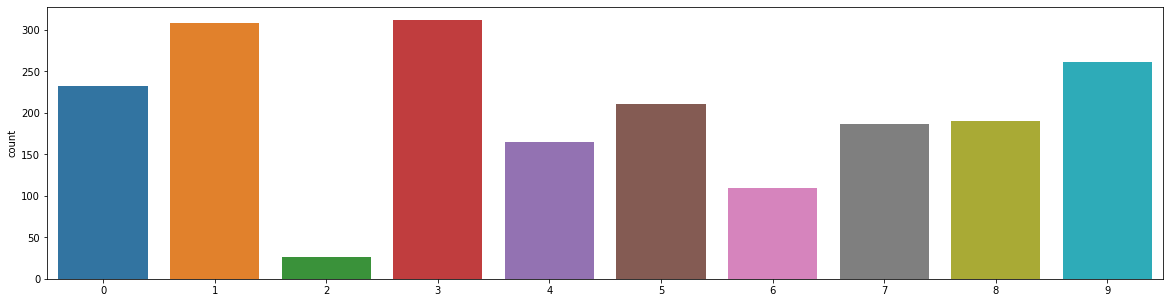

In [14]:
freq=[j for j in papertopic.values()]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.countplot(freq)

In [15]:
def extract_topic(p,topic_num):
    topic=[]
    for i in p.keys():
        if p[i]==topic_num:
            topic.append(int(i))
    return topic
topic0=extract_topic(papertopic,0)
topic1=extract_topic(papertopic,1)
topic2=extract_topic(papertopic,2)
topic3=extract_topic(papertopic,3)
topic4=extract_topic(papertopic,4)
topic5=extract_topic(papertopic,5)
topic6=extract_topic(papertopic,6)
topic7=extract_topic(papertopic,7)
topic8=extract_topic(papertopic,8)
topic9=extract_topic(papertopic,9)

In [19]:
## Here i have tried to make heading from paper Title in those topic+common words in those topic
paper_topic1=[data['text'][i]["title"] for i in topic1]
paper_topic5=[data['text'][i]["title"] for i in topic5]
print("Most Common words:",lda_model.print_topic(1, 50))
print("\nPaper Catogarized in this topic")
for i in paper_topic1:
    print(i)

Most Common words: 0.008*"cells" + 0.004*"1" + 0.004*"t" + 0.004*"2" + 0.004*"cell" + 0.003*"infection" + 0.003*"c" + 0.003*"virus" + 0.003*"e" + 0.003*"5" + 0.003*"3" + 0.002*"patients" + 0.002*"disease" + 0.002*"model" + 0.002*"protein" + 0.002*"10" + 0.002*"4" + 0.002*"n" + 0.002*"r" + 0.002*"different" + 0.002*"s" + 0.002*"p" + 0.002*"human" + 0.002*"table" + 0.002*"system" + 0.002*"results" + 0.002*"analysis" + 0.002*"treatment" + 0.002*"covid-19" + 0.002*"proteins" + 0.002*"viral" + 0.002*"expression" + 0.002*"infected" + 0.002*"health" + 0.001*"reported" + 0.001*"d" + 0.001*"including" + 0.001*"available" + 0.001*"q" + 0.001*"h" + 0.001*"o" + 0.001*"response" + 0.001*"observed" + 0.001*"levels" + 0.001*"6" + 0.001*"control" + 0.001*"influenza" + 0.001*"days" + 0.001*"shown" + 0.001*"showed"

Paper Catogarized in this topic
TWIRLS, an automated topic-wise inference method based on massive literature, suggests a possible mechanism via ACE2 for the pathological changes in the human

In [20]:
def subtopic(topic1,NUM_TOPICS):
    topic1_data=[tokens_data[i] for i in topic1]
    topic1_tokenized=[]
    for i in topic1_data:
        topic1_tokenized.append(tokens_data[i])
    dictionary = corpora.Dictionary(topic1_tokenized)
    print(len(dictionary))
    corpus = [dictionary.doc2bow(t) for t in topic1_tokenized]
    model_topic1 = models.LdaModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)

    papertopic1={}
    for i,t in enumerate(topic1_data):
        result=model_topic1[dictionary.doc2bow(tokens_data[i])]
        maxresult=result[0][1]
        for j in result:
            if j[1]>maxresult:
                maxresult=j[1]
        topic=[j[0] for j in result if j[1]==maxresult][0]
        papertopic1[str(i)]=topic
    return papertopic1

In [22]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))
# f, axes = plt.subplots(2, 5,figsize=(20,10))
# axes[0][0].title.set_text('SubTopics Under Topic 0')
# axes[0][1].title.set_text('SubTopics Under Topic 1')
# axes[0][2].title.set_text('SubTopics Under Topic 2')
# axes[0][3].title.set_text('SubTopics Under Topic 3')
# axes[0][4].title.set_text('SubTopics Under Topic 4')
# axes[1][0].title.set_text('SubTopics Under Topic 5')
# axes[1][1].title.set_text('SubTopics Under Topic 6')
# axes[1][2].title.set_text('SubTopics Under Topic 7')
# axes[1][3].title.set_text('SubTopics Under Topic 8')
# axes[1][4].title.set_text('SubTopics Under Topic 9')
# sns.countplot([j for j in subtopic(topic0,5).values()],ax=axes[0][0])
# sns.countplot([j for j in subtopic(topic1,5).values()],ax=axes[0][1])
# sns.countplot([j for j in subtopic(topic2,5).values()],ax=axes[0][2])
# sns.countplot([j for j in subtopic(topic3,5).values()],ax=axes[0][3])
# sns.countplot([j for j in subtopic(topic4,5).values()],ax=axes[0][4])
# sns.countplot([j for j in subtopic(topic5,5).values()],ax=axes[1][0])
# sns.countplot([j for j in subtopic(topic6,5).values()],ax=axes[1][1])
# sns.countplot([j for j in subtopic(topic7,5).values()],ax=axes[1][2])
# sns.countplot([j for j in subtopic(topic8,5).values()],ax=axes[1][3])
# sns.countplot([j for j in subtopic(topic9,5).values()],ax=axes[1][4])

## 